In [1]:
import torch 
import monai
from torch import nn
import SimpleITK as sitk 
import numpy as np 
import matplotlib.pyplot as plt

/Users/pwilson/anaconda3/envs/ai/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/pwilson/anaconda3/envs/ai/lib/python3.11/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <BD0BF3A8-D5AB-3800-B76D-0E8456DB6589> /Users/pwilson/anaconda3/envs/ai/lib/python3.11/site-packages/torchvision/image.so
  Expected in:     <25C510F7-7AEE-3D64-80ED-95874DC6BECD> /Users/pwilson/anaconda3/envs/ai/lib/python3.11/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
image_array = sitk.GetArrayFromImage(sitk.ReadImage('Task09_Spleen/imagesTr/spleen_2.nii.gz'))

Text(0.5, 1.0, 'laplace filtered')

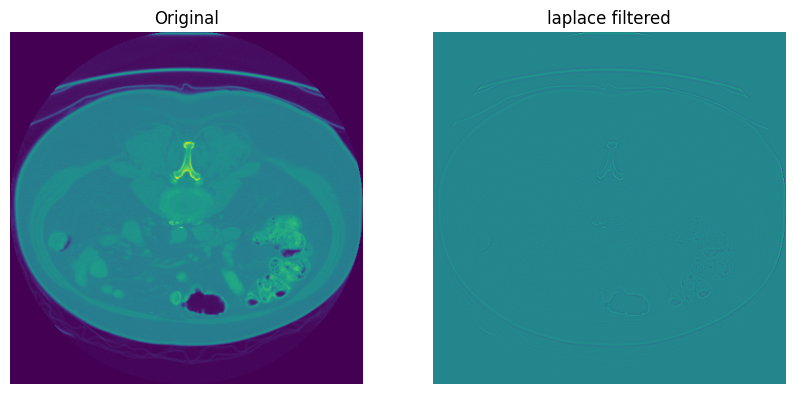

In [3]:
from skimage.filters import laplace


image = image_array[50] # use 50th slice for demo
output = laplace(image_array[50])


fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image)
ax[0].axis('off')
ax[0].set_title('Original')

ax[1].imshow(output)
ax[1].axis('off')
ax[1].set_title('laplace filtered')


## Demo of convolutional layer

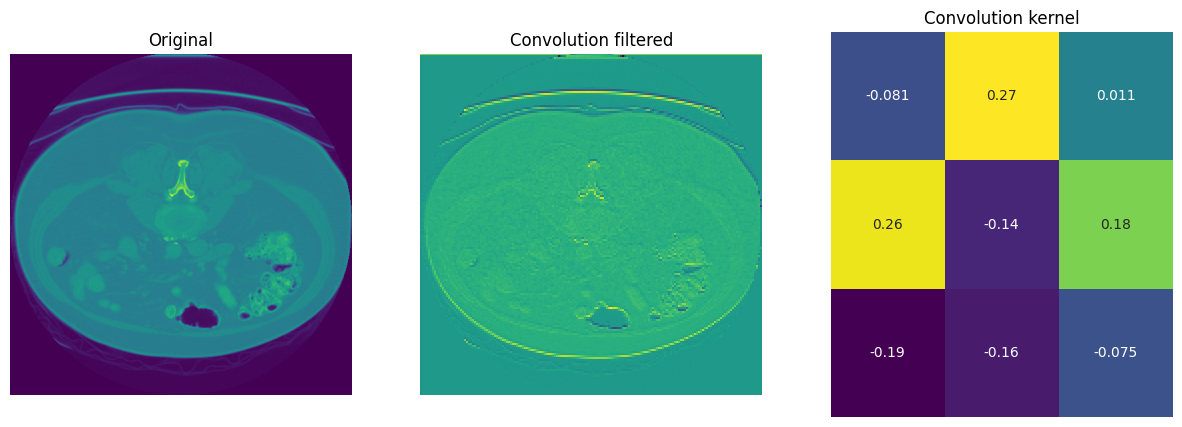

In [4]:
import seaborn as sns 

image_tensor = torch.tensor(image_array[50])[None, None, ...].float()

with torch.no_grad():
    layer = torch.nn.Conv2d(1, 4, 3, 3, 1)
    out = layer(image_tensor)
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(image_tensor[0,0])
    ax[0].axis('off')
    ax[0].set_title('Original')
    ax[1].imshow(out[0, 0])
    ax[1].axis('off')
    ax[1].set_title('Convolution filtered')
    
    sns.heatmap(
        layer.weight[0,0], 
        ax=ax[2], 
        cmap='viridis', 
        annot=True, 
        cbar=False
    )
    ax[2].axis('off')
    ax[2].set_title('Convolution kernel')



In [5]:
# Helpers

class UpsampleLayer(nn.Module): 
    def forward(self, x): 
        B, N, H, W, D = x.shape
        return torch.nn.functional.interpolate(x, (H * 2, W * 2, D * 2))


class EncoderBlock(nn.Module): 
    ...


class DecoderBlock(nn.Module): 
    ...


class EncoderDecoderConvNet(nn.Module): 
    ...



In [23]:
from models import EncoderDecoderNetwork

model = EncoderDecoderNetwork() # Randomly initialized model

first_layer_conv_filters = model.layers[0].conv.weight.data.detach()
print(first_layer_conv_filters.shape) # num_filters, input_chanels, H, W, D

torch.Size([16, 1, 3, 3, 3])


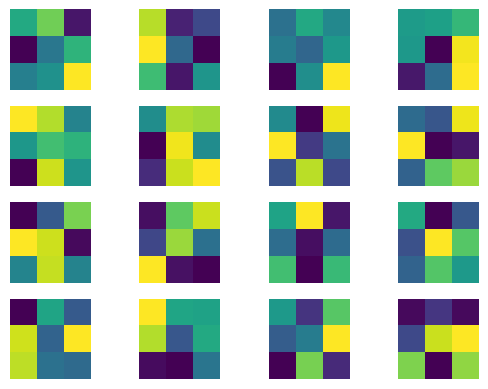

In [24]:
fig, ax = plt.subplots(4, 4)
ax = ax.flatten()
for i in range(16): 
    ax[i].axis('off')
    ax[i].imshow(first_layer_conv_filters[i, 0, ..., 0])

In [25]:
model.load_state_dict(torch.load('encoder_decoder_spleen_seg.pt'))

<All keys matched successfully>

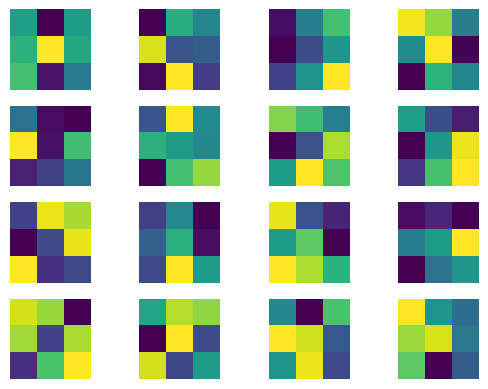

In [26]:
fig, ax = plt.subplots(4, 4)
ax = ax.flatten()
for i in range(16): 
    ax[i].axis('off')
    ax[i].imshow(first_layer_conv_filters[i, 0, ..., 0])

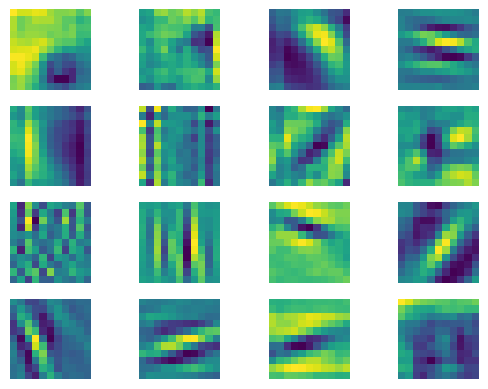

In [21]:
from torchvision.models.alexnet import alexnet

model = alexnet(pretrained=True)
first_layer_conv_filters = model.features[0].weight.data.detach()

fig, ax = plt.subplots(4, 4)
ax = ax.flatten()
for i in range(16): 
    ax[i].axis('off')
    ax[i].imshow(first_layer_conv_filters[i, 0, ...])